In [1]:
import sys  
sys.path.insert(1, '.\..\..\SOURCES\.')

import random

random.seed(10)

In [6]:
from DATA import MG17
from IPReservoir import IPReservoir
from Evaluator import Evaluator
from Metrics import *
from IPMask import IPMask

## Neural Avalanches Analysis

In [8]:
from DATA import MG17

data = MG17(percentages=[80, 0, 20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [19]:
vanilla_reservoir = Reservoir(N = 100, bias=False, desired_rho=0.8)
gaussian_reservoir = IPReservoir(N=100, bias=False, desired_rho=0.8, mask= IPMask.gaussian(100, std=0.25))
trimodal_reservoir = IPReservoir(N=100, bias=False, desired_rho=0.8, mask=IPMask.trimodal(100, linear_rate=0.75, mu=0.85, std_bim=0.1))

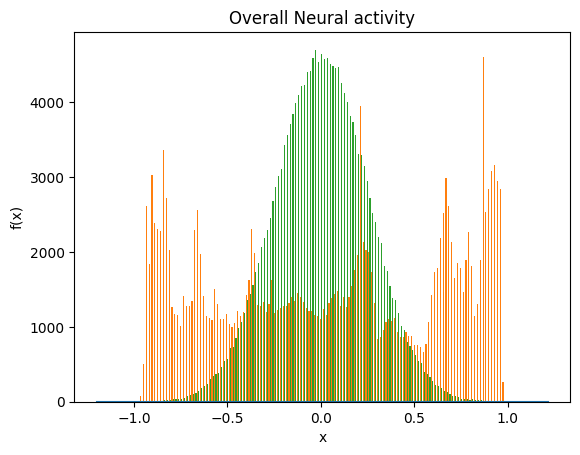

In [20]:
gaussian_reservoir.plot_neural_activity(X_TS)

- Epoch: 1) | KL Divergence value: 0.18020668625831604. | Spectral radius: 0.815820038318634
- Epoch: 2) | KL Divergence value: 0.1556554138660431. | Spectral radius: 0.8310133814811707
- Epoch: 3) | KL Divergence value: 0.1341457962989807. | Spectral radius: 0.846082866191864
- Epoch: 4) | KL Divergence value: 0.11640150099992752. | Spectral radius: 0.8611098527908325
- Epoch: 5) | KL Divergence value: 0.10223835706710815. | Spectral radius: 0.8754273056983948
- Epoch: 6) | KL Divergence value: 0.09130820631980896. | Spectral radius: 0.8897403478622437
- Epoch: 7) | KL Divergence value: 0.08317644149065018. | Spectral radius: 0.9040558338165283
- Epoch: 8) | KL Divergence value: 0.07736826688051224. | Spectral radius: 0.9177660942077637
- Epoch: 9) | KL Divergence value: 0.07348678261041641. | Spectral radius: 0.931327223777771
- Epoch: 10) | KL Divergence value: 0.07123908400535583. | Spectral radius: 0.9448870420455933


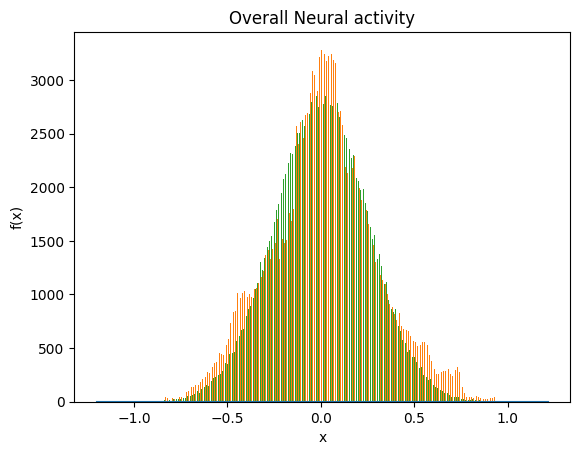

0.006701416

In [21]:
gaussian_reservoir.IP_online(X_TR, eta=0.0000025, eval_kl=X_TS, epochs=10, verbose=True)
gaussian_reservoir.plot_neural_activity(X_TS)
MLLE(X_TS).evaluate(gaussian_reservoir)

In [84]:
DeltaPhi().evaluate(gaussian_reservoir)

0.06001852993085053

In [23]:
H_gaussian = gaussian_reservoir.predict(X_TS)

- Epoch: 1) | KL Divergence value: 0.06648389995098114. | Spectral radius: 0.8158222436904907
- Epoch: 2) | KL Divergence value: 0.05130254104733467. | Spectral radius: 0.8310117721557617
- Epoch: 3) | KL Divergence value: 0.04258396103978157. | Spectral radius: 0.8460814952850342
- Epoch: 4) | KL Divergence value: 0.03779270872473717. | Spectral radius: 0.8611099123954773
- Epoch: 5) | KL Divergence value: 0.03536403551697731. | Spectral radius: 0.8754268288612366
- Epoch: 6) | KL Divergence value: 0.034410227090120316. | Spectral radius: 0.8897383213043213
- Epoch: 7) | KL Divergence value: 0.034306906163692474. | Spectral radius: 0.9040548205375671
- Epoch: 8) | KL Divergence value: 0.0346185602247715. | Spectral radius: 0.9177654385566711
- Epoch: 9) | KL Divergence value: 0.035171911120414734. | Spectral radius: 0.9313262701034546
- Epoch: 10) | KL Divergence value: 0.035878799855709076. | Spectral radius: 0.9448862075805664


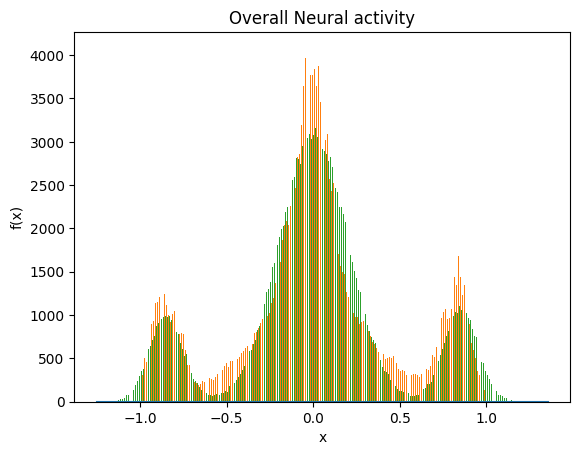

0.10023558

In [22]:
trimodal_reservoir.IP_online(X_TR, eta=0.0000025, eval_kl=X_TS, epochs=20, verbose=True)
trimodal_reservoir.plot_neural_activity(X_TS)
MLLE(X_TS).evaluate(trimodal_reservoir)

In [85]:
DeltaPhi().evaluate(trimodal_reservoir)

0.22617944869384218

In [25]:
H_trim = trimodal_reservoir.predict(X_TS)

In [41]:
import seaborn as sns
import pandas as pd

1999

In [55]:
df = pd.DataFrame(H_trim[:,1:4].numpy())
df.insert(0,'Index', np.arange(X))

In [56]:
df

,Index,0,1,2
0,0,-0.222960,0.326667,-0.075704
1,1,-0.233492,0.157212,0.079854
2,2,-0.206793,0.066576,0.148309
3,3,-0.133388,0.019722,0.113966
4,4,-0.013974,-0.021572,0.060009
...,...,...,...,...
1994,1994,0.071810,0.110562,-0.566204
1995,1995,0.025311,0.142273,-0.517078
1996,1996,-0.023338,0.168516,-0.451060
1997,1997,-0.067473,0.185058,-0.370559


In [66]:
np.arange(H_trim.shape[0])

array([   0,    1,    2, ..., 1996, 1997, 1998])

In [67]:
df

,Neuron 1,Neuron 2,Neuron 3
0,0.010111,-0.062988,-0.057637
1,-0.222960,-0.233492,-0.206793
2,0.326667,0.157212,0.066576
3,-0.075704,0.079854,0.148309
4,0.811461,0.804249,0.799424
...,...,...,...
95,0.767020,0.754724,0.753660
96,-0.134095,-0.062919,0.041297
97,-0.093547,-0.342121,-0.227092
98,-0.015135,-0.079399,0.010824


In [93]:
torch.mean(H_gaussian,axis = 1).shape

torch.Size([1999])

In [95]:
tensor_data = torch.vstack([torch.mean(H_gaussian,axis = 1), X_TS])

In [98]:
tensor_data.shape

torch.Size([2, 1999])

Text(0, 0.5, 'Data Values')

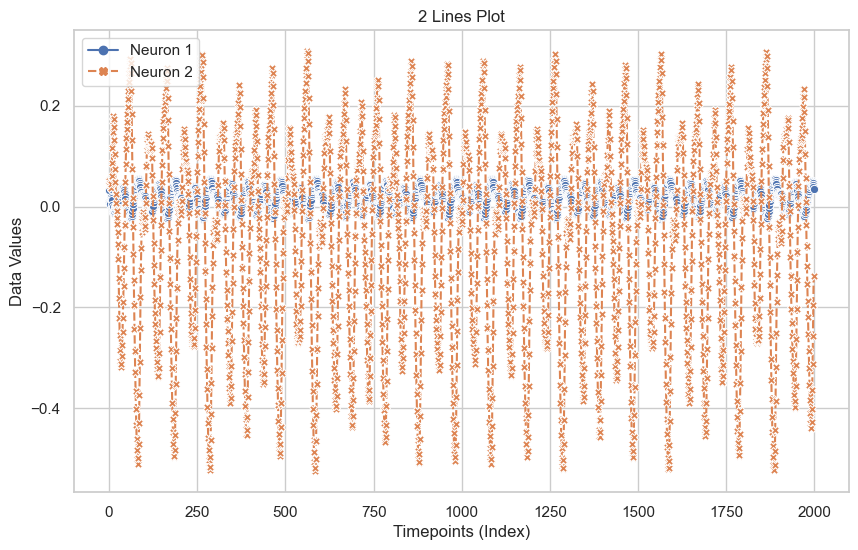

In [99]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example 2D tensor with N lines
N = 2
timepoints = np.arange(H_trim.shape[0])

#tensor_data = H_gaussian.numpy()[:,0:N]

# Create a Pandas DataFrame with the tensor data
df = pd.DataFrame(tensor_data.numpy().T, columns=[f'Neuron {i+1}' for i in range(N)])

# Use Seaborn's lineplot() function to plot the N lines
sns.set(style="whitegrid")  # Set the style if needed
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

sns.lineplot(data=df, markers=True)

plt.title(f'{N} Lines Plot')
plt.xlabel('Timepoints (Index)')
plt.ylabel('Data Values')

In [86]:
gaussian_reservoir.mask.means()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [ ]:
trimodal_reservoir

## Sample of Neural Avalanche Plotting

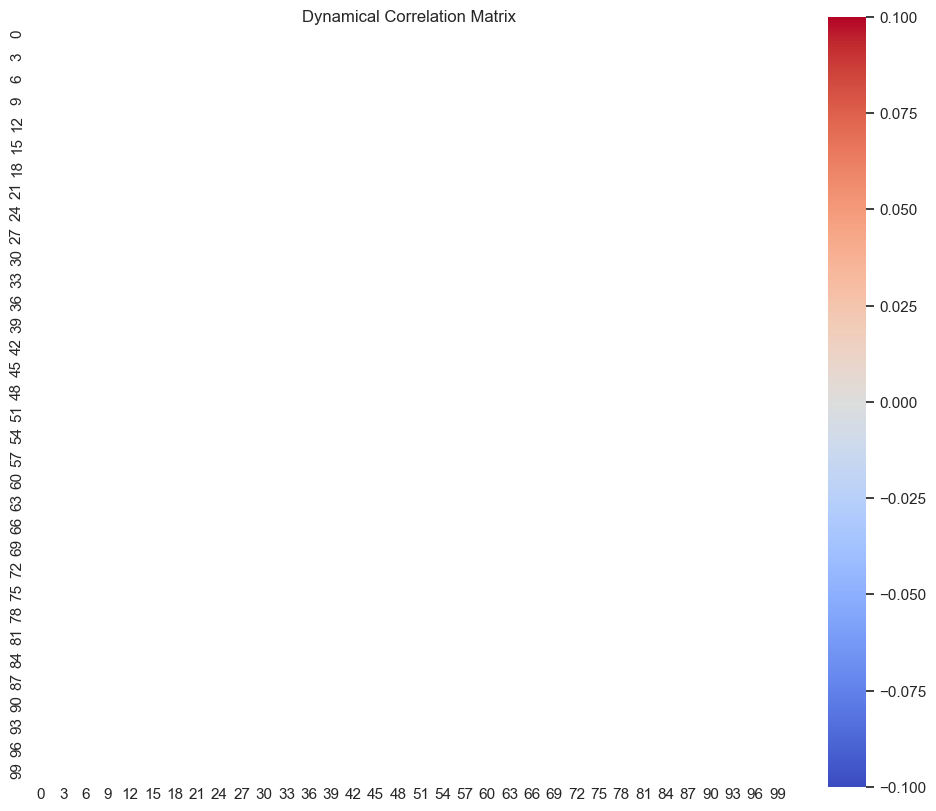

ValueError: attempt to get argmin of an empty sequence

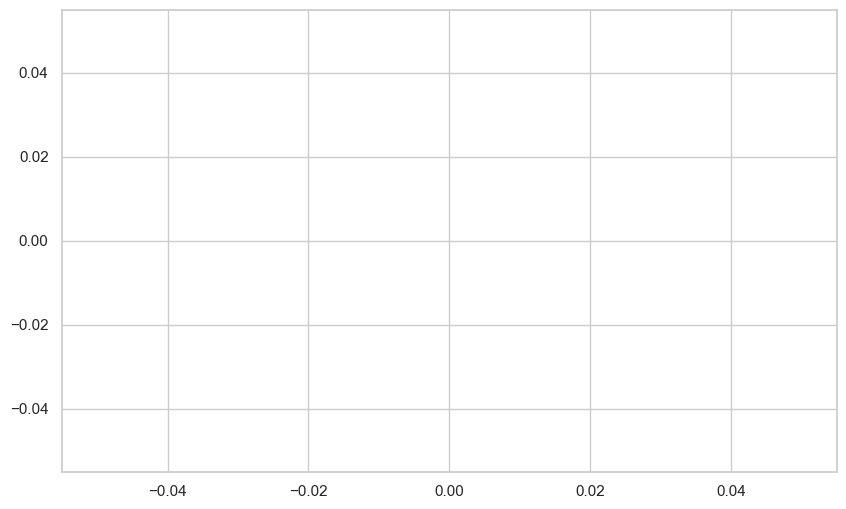

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to simulate reservoir dynamics
def simulate_reservoir(N, T, p_connect):
    # Generate random connectivity matrix with p_connect probability of connection
    connectivity_matrix = (np.random.rand(N, N) < p_connect).astype(float)
    
    # Set diagonal elements to zero (no self-connections)
    np.fill_diagonal(connectivity_matrix, 0)
    
    # Initialize reservoir state
    reservoir_state = np.zeros(N)
    
    # Simulate reservoir dynamics
    activation_history = []
    for t in range(T):
        # Update reservoir state using a simple recurrent update rule
        reservoir_state = np.tanh(np.dot(connectivity_matrix, reservoir_state))
        
        # Store the reservoir state at each time step
        activation_history.append(reservoir_state.copy())
    
    return np.array(activation_history)

# Function to compute dynamical correlation
def compute_dynamical_correlation(activation_history):
    correlation_matrix = np.corrcoef(activation_history.T)
    return correlation_matrix

# Function to plot activation avalanches
def plot_activation_avalanches(activation_history):
    avalanche_sizes = np.sum(np.abs(np.diff(activation_history, axis=0)) > 0, axis=1)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(avalanche_sizes, bins=range(1, max(avalanche_sizes) + 2), kde=False)
    plt.title('Activation Avalanche Sizes')
    plt.xlabel('Avalanche Size')
    plt.ylabel('Frequency')
    plt.show()

# Set parameters
N_neurons = 100
T_timepoints = 1000
p_connection = 0.1

# Simulate reservoir dynamics
reservoir_activations = simulate_reservoir(N_neurons, T_timepoints, p_connection)

# Compute dynamical correlation
correlation_matrix = compute_dynamical_correlation(reservoir_activations)

# Plot dynamical correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, annot=False)
plt.title('Dynamical Correlation Matrix')
plt.show()

# Plot activation avalanches
plot_activation_avalanches(reservoir_activations)